<a href="https://colab.research.google.com/github/vitorchaud/calc_num/blob/main/ajusteCurvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ajuste de Curvas (Curve Fitting) - Conceitos e Erros

O ajuste de curvas é um processo fundamental em muitas áreas da ciência e engenharia, onde o objetivo é encontrar uma função matemática que melhor represente um conjunto de pontos de dados observados. Essa função pode ser usada para interpolar (estimar valores entre os pontos conhecidos), extrapolar (prever valores fora do intervalo dos pontos conhecidos) ou simplesmente para compreender o comportamento subjacente dos dados.

### Princípios Gerais

Dado um conjunto de pontos de dados $\{(x_i, y_i)\}_{i=1}^N$, o ajuste de curvas busca encontrar uma função $f(x, \theta)$ (onde $\theta$ é um vetor de parâmetros) que minimize a "distância" entre os valores observados $y_i$ e os valores previstos pela função $f(x_i, \theta)$. A escolha da função $f$ (por exemplo, linear, polinomial, exponencial) e da métrica de "distância" (ou erro) são decisões cruciais no processo.

### Tipos de Erros (Métricas de Ajuste)

A "distância" entre os dados observados e a curva ajustada é quantificada por uma função de erro (também conhecida como função de custo ou função objetivo). Diferentes funções de erro penalizam os desvios de maneiras distintas. Abaixo estão alguns dos erros mais comuns que exploraremos:

1.  **Erro Máximo Absoluto (Norma $\ell_\infty$)**:
    Também conhecido como erro de Chebyshev, este erro mede o maior desvio absoluto entre os valores observados e os valores preditos. É sensível a _outliers_ e busca o melhor ajuste no "pior caso".
    
    $\qquad E_{\infty} = \max_{i} |y_i - f(x_i, \theta)|$

2.  **Erro Médio Absoluto (Norma $\ell_1$)**:
    Este erro calcula a média dos valores absolutos dos desvios. É mais robusto a _outliers_ do que o erro quadrático médio, pois não eleva ao quadrado os grandes desvios.
    
    $\qquad E_1 = \frac{1}{N} \sum_{i=1}^N |y_i - f(x_i, \theta)|$

3.  **Erro Quadrático Médio (MSE)**:
    Este é o **Erro Quadrático Médio (MSE)**. No contexto do ajuste de curvas e mínimos quadrados, buscamos minimizar a **Soma dos Quadrados dos Erros (SSE)**, que é $\sum_{i=1}^N (y_i - f(x_i, \theta))^2$. Minimizar o MSE é equivalente a minimizar o SSE, pois o $N$ é uma constante positiva. A **Norma $\ell_2$** de um vetor de erros, por sua vez, é a raiz quadrada da soma dos quadrados dos erros. O MSE penaliza mais fortemente os desvios maiores devido ao quadrado e é a base para o método dos **mínimos quadrados**.
    
    $\qquad E_2 = MSE = \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i, \theta))^2$

Em particular, a minimização de $E_2$ (MSE) será o foco principal de nossa exploração no contexto dos mínimos quadrados, devido à sua popularidade e propriedades matemáticas bem estabelecidas.

### Simplificação para o Caso Linear

No caso de um ajuste linear, a função $f(x, \theta)$ é definida como $f(x) = ax + b$, onde os parâmetros a serem ajustados são $\theta = (a, b)$. Substituindo esta função nas equações de erro, obtemos as seguintes expressões:

1.  **Erro Máximo Absoluto (Norma $\ell_\infty$) para Ajuste Linear**:
    
    $\qquad E_{\infty} = \max_{i} |y_i - (ax_i + b)|$

2.  **Erro Médio Absoluto (Norma $\ell_1$) para Ajuste Linear**:
    
    $\qquad E_1 = \frac{1}{N} \sum_{i=1}^N |y_i - (ax_i + b)|$

3.  **Erro Quadrático Médio (MSE) para Ajuste Linear**:
    
    $\qquad E_2 = \frac{1}{N} \sum_{i=1}^N (y_i - (ax_i + b))^2$

Estas equações nos permitirão calcular e comparar o desempenho de diferentes ajustes lineares baseados nos respectivos critérios de erro. Em particular, a minimização de $E_2$ (MSE) é o objetivo do método dos mínimos quadrados para regressão linear.

# Task
Generate synthetic data, with and without an outlier, and perform linear regression using L2 (Least Squares), L1 (Least Absolute Deviations), and L-infinity (Minimax) criteria. Visualize the fitted lines for both datasets on a single plot, comparing the robustness of each method to noise and outliers. Finally, analyze and discuss the implications of using each error metric.

## Preparar Ambiente e Gerar Dados

### Subtask:
Importar as bibliotecas necessárias (`numpy`, `matplotlib`, `scipy.optimize` para L1/L-infinity e `sklearn` para L2). Gerar 10 pontos de dados `(x, y)` com uma tendência linear e adicionar ruído gaussiano. Em seguida, criar um segundo conjunto de dados semelhante, mas com a adição de um outlier significativo em um dos pontos.


**Reasoning**:
The subtask requires importing necessary libraries and generating two datasets: one with linear trend and Gaussian noise, and another with an added outlier. These steps will be performed in a single code block to prepare the data for further analysis.



In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# 2. Gere um array x_data com 10 pontos igualmente espaçados entre 0 e 10
x_data = np.linspace(0, 10, 10)

# 3. Defina os parâmetros da linha verdadeira
true_a = 0.5  # inclinação
true_b = 2    # intercepto

# 4. Calcule os valores y_true correspondentes
y_true = true_a * x_data + true_b

# 5. Gere ruído gaussiano
np.random.seed(42) # Para reprodutibilidade
noise = np.random.normal(0, 0.8, size=x_data.shape)

# 6. Crie o primeiro conjunto de dados y_data adicionando o ruído
y_data = y_true + noise

# 7. Crie uma cópia de y_data chamada y_data_outlier
y_data_outlier = np.copy(y_data)

# 8. Introduza um outlier significativo em y_data_outlier
# Alterando o quinto ponto (índice 4) para um valor muito diferente
y_data_outlier[4] += 10 # Adiciona 10 ao valor original do quinto ponto

print("x_data:", x_data)
print("y_data (sem outlier):", y_data)
print("y_data_outlier (com outlier):", y_data_outlier)


x_data: [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
y_data (sem outlier): [2.39737132 2.44494411 3.62926194 4.88509055 4.03489952 4.59046821
 6.59670359 6.50283667 6.06886494 7.43404803]
y_data_outlier (com outlier): [ 2.39737132  2.44494411  3.62926194  4.88509055 14.03489952  4.59046821
  6.59670359  6.50283667  6.06886494  7.43404803]


In [22]:
def linear_model(x, params):
    a, b = params
    return a * x + b

# Objective functions for minimization

# L2 (MSE) loss function
def l2_loss(params, x, y):
    return np.mean((y - linear_model(x, params))**2)

# L1 (MAE) loss function
def l1_loss(params, x, y):
    return np.mean(np.abs(y - linear_model(x, params)))

# L-infinity (Max Abs Error) loss function
def linf_loss(params, x, y):
    return np.max(np.abs(y - linear_model(x, params)))

# --- Regression for data WITHOUT outlier (y_data) ---

# Initial guess for parameters (a, b)
initial_params = [0, 0]

# L2 Regression (Least Squares) using sklearn
lin_reg_l2 = LinearRegression()
lin_reg_l2.fit(x_data.reshape(-1, 1), y_data)
params_l2_no_outlier = [lin_reg_l2.coef_[0], lin_reg_l2.intercept_]
print(f"L2 (no outlier) - a: {params_l2_no_outlier[0]:.4f}, b: {params_l2_no_outlier[1]:.4f}")

# L1 Regression (Least Absolute Deviations) using scipy.optimize.minimize
res_l1_no_outlier = minimize(l1_loss, initial_params, args=(x_data, y_data), method='Nelder-Mead')
params_l1_no_outlier = res_l1_no_outlier.x
print(f"L1 (no outlier) - a: {params_l1_no_outlier[0]:.4f}, b: {params_l1_no_outlier[1]:.4f}")

# L-infinity Regression (Minimax) using scipy.optimize.minimize
# For L-infinity, we need to define the objective for `minimize` as it directly optimizes a maximum value.
# This is typically done by adding an auxiliary variable to minimize the max error.
# The `linf_loss` directly returns the max absolute error, so `minimize` will try to find params that minimize this max error.
res_linf_no_outlier = minimize(linf_loss, initial_params, args=(x_data, y_data), method='Nelder-Mead')
params_linf_no_outlier = res_linf_no_outlier.x
print(f"L-inf (no outlier) - a: {params_linf_no_outlier[0]:.4f}, b: {params_linf_no_outlier[1]:.4f}")

print("\n" + "-"*30 + "\n")

# --- Regression for data WITH outlier (y_data_outlier) ---

# L2 Regression (Least Squares) using sklearn
lin_reg_l2_outlier = LinearRegression()
lin_reg_l2_outlier.fit(x_data.reshape(-1, 1), y_data_outlier)
params_l2_outlier = [lin_reg_l2_outlier.coef_[0], lin_reg_l2_outlier.intercept_]
print(f"L2 (with outlier) - a: {params_l2_outlier[0]:.4f}, b: {params_l2_outlier[1]:.4f}")

# L1 Regression (Least Absolute Deviations) using scipy.optimize.minimize
res_l1_outlier = minimize(l1_loss, initial_params, args=(x_data, y_data_outlier), method='Nelder-Mead')
params_l1_outlier = res_l1_outlier.x
print(f"L1 (with outlier) - a: {params_l1_outlier[0]:.4f}, b: {params_l1_outlier[1]:.4f}")

# L-infinity Regression (Minimax) using scipy.optimize.minimize
res_linf_outlier = minimize(linf_loss, initial_params, args=(x_data, y_data_outlier), method='Nelder-Mead')
params_linf_outlier = res_linf_outlier.x
print(f"L-inf (with outlier) - a: {params_linf_outlier[0]:.4f}, b: {params_linf_outlier[1]:.4f}")

# Store the parameters for later plotting
regression_params = {
    'l2_no_outlier': params_l2_no_outlier,
    'l1_no_outlier': params_l1_no_outlier,
    'linf_no_outlier': params_linf_no_outlier,
    'l2_outlier': params_l2_outlier,
    'l1_outlier': params_l1_outlier,
    'linf_outlier': params_linf_outlier
}

L2 (no outlier) - a: 0.4950, b: 2.3833
L1 (no outlier) - a: 0.5037, b: 2.3974
L-inf (no outlier) - a: 0.9136, b: 0.1723

------------------------------

L2 (with outlier) - a: 0.4405, b: 3.6560
L1 (with outlier) - a: 0.4892, b: 2.5421
L-inf (with outlier) - a: 0.4659, b: 6.9457


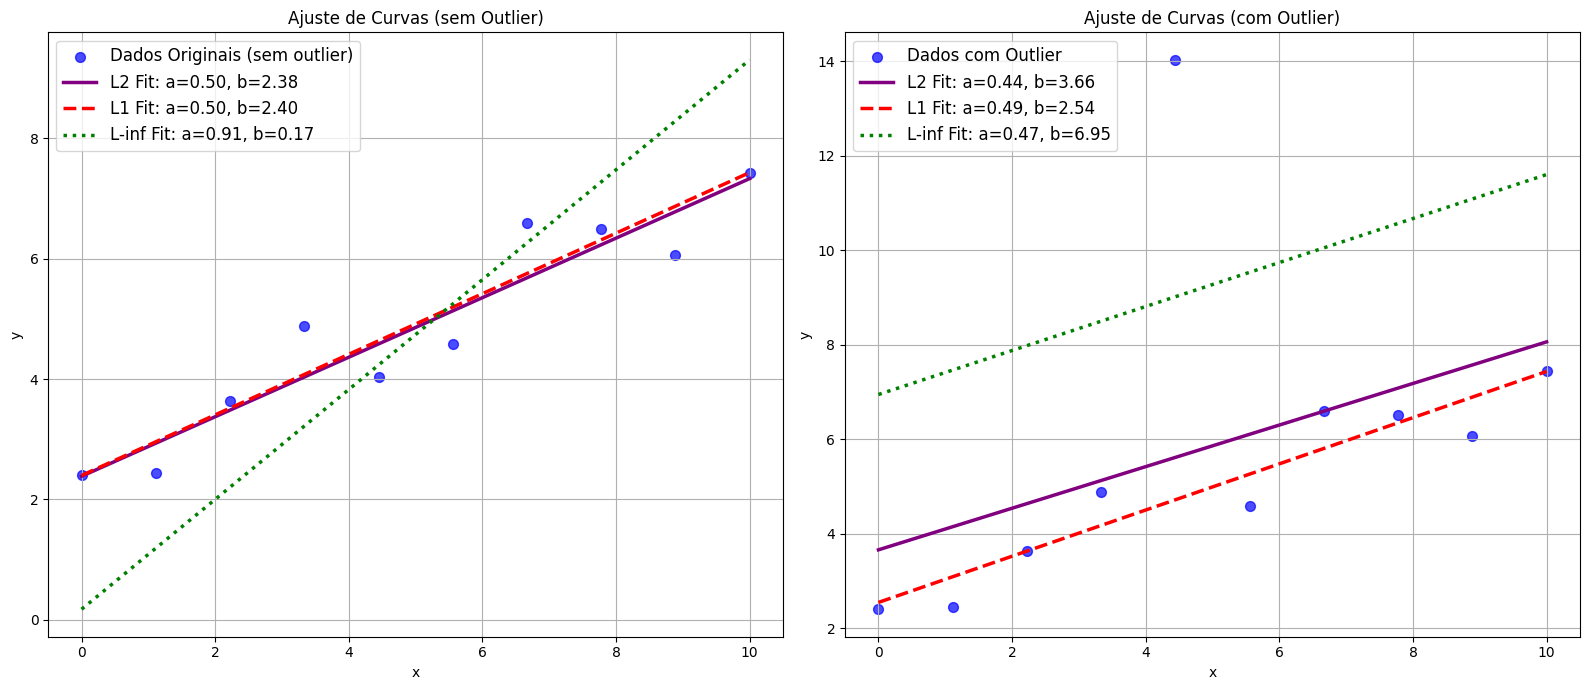

In [23]:
plt.figure(figsize=(16, 7))

# --- Subplot 1: Dados sem Outlier ---
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro plot
plt.scatter(x_data, y_data, label='Dados Originais (sem outlier)', color='blue', alpha=0.7, s=50) # Aumenta marker size

# Plot fitted lines for data without outlier
plt.plot(x_data, linear_model(x_data, regression_params['l2_no_outlier']),
         label=f'L2 Fit: a={regression_params['l2_no_outlier'][0]:.2f}, b={regression_params['l2_no_outlier'][1]:.2f}',
         color='purple', linestyle='-', linewidth=2.5) # Aumenta line width
plt.plot(x_data, linear_model(x_data, regression_params['l1_no_outlier']),
         label=f'L1 Fit: a={regression_params['l1_no_outlier'][0]:.2f}, b={regression_params['l1_no_outlier'][1]:.2f}',
         color='red', linestyle='--', linewidth=2.5) # Aumenta line width
plt.plot(x_data, linear_model(x_data, regression_params['linf_no_outlier']),
         label=f'L-inf Fit: a={regression_params['linf_no_outlier'][0]:.2f}, b={regression_params['linf_no_outlier'][1]:.2f}',
         color='green', linestyle=':', linewidth=2.5) # Aumenta line width

# 'Linha Verdadeira' removida

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Curvas (sem Outlier)')
plt.legend(loc='upper left', fontsize=12) # Aumenta legend text size
plt.grid(True)

# --- Subplot 2: Dados com Outlier ---
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo plot
plt.scatter(x_data, y_data_outlier, label='Dados com Outlier', color='blue', marker='o', alpha=0.7, s=50) # Aumenta marker size

# Plot fitted lines for data with outlier
plt.plot(x_data, linear_model(x_data, regression_params['l2_outlier']),
         label=f'L2 Fit: a={regression_params['l2_outlier'][0]:.2f}, b={regression_params['l2_outlier'][1]:.2f}',
         color='purple', linestyle='-', linewidth=2.5) # Aumenta line width
plt.plot(x_data, linear_model(x_data, regression_params['l1_outlier']),
         label=f'L1 Fit: a={regression_params['l1_outlier'][0]:.2f}, b={regression_params['l1_outlier'][1]:.2f}',
         color='red', linestyle='--', linewidth=2.5) # Aumenta line width
plt.plot(x_data, linear_model(x_data, regression_params['linf_outlier']),
         label=f'L-inf Fit: a={regression_params['linf_outlier'][0]:.2f}, b={regression_params['linf_outlier'][1]:.2f}',
         color='green', linestyle=':', linewidth=2.5) # Aumenta line width


plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Curvas (com Outlier)')
plt.legend(loc='upper left', fontsize=12) # Aumenta legend text size
plt.grid(True)

plt.tight_layout()
plt.show()

## Mínimos Quadrados e Projeção Ortogonal (Visão Matricial)

A regressão linear por **Mínimos Quadrados (L2)** se destaca dos métodos L1 e L-infinity por possuir uma **solução analítica de forma fechada**, que pode ser elegantemente derivada usando álgebra linear.

### A Perspectiva da Projeção Ortogonal

Dado um sistema linear $Y = X\beta$, onde:
*   $Y$ é o vetor das variáveis dependentes ($y_i$).
*   $X$ é a matriz de _design_ que contém as variáveis independentes ($x_i$) e uma coluna de uns para o intercepto.
*   $\beta$ é o vetor dos parâmetros que queremos estimar (nossos $a$ e $b$).

Frequentemente, o vetor $Y$ não está no espaço de colunas de $X$, o que significa que não há um vetor $\beta$ que satisfaça $Y = X\beta$ exatamente. O método dos mínimos quadrados busca encontrar o vetor $\hat{Y} = X\hat{\beta}$ no espaço de colunas de $X$ que esteja mais "próximo" de $Y$. Essa "proximidade" é medida pela minimização da norma $\ell_2$ do vetor de resíduos $e = Y - X\beta$, ou seja, minimizamos a soma dos quadrados dos erros.

A solução para $\hat{\beta}$ ocorre quando o vetor de resíduos $e = Y - X\hat{\beta}$ é **ortogonal** ao espaço de colunas de $X$. Matematicamente, isso se traduz nas seguintes **Equações Normais**:

$\qquad X^T(Y - X\hat{\beta}) = 0$

Que podem ser reescritas como:

$\qquad X^TY = X^TX\hat{\beta}$

Se a matriz $(X^TX)$ for invertível, podemos isolar $\hat{\beta}$ para obter a solução de forma fechada:

$\qquad \hat{\beta} = (X^TX)^{-1}X^TY$

### Implicações

Essa solução de forma fechada é o que permite que bibliotecas como `sklearn.linear_model.LinearRegression` calculem os parâmetros da regressão L2 de forma direta e eficiente, sem a necessidade de algoritmos de otimização iterativos (como os usados por `scipy.optimize.minimize` para L1 e L-infinity). É um pilar fundamental da regressão linear e de muitas outras técnicas estatísticas.

## Mínimos Quadrados para Regressão Polinomial

O método dos mínimos quadrados (L2) não se limita apenas a ajustes lineares ($y = ax + b$). Ele pode ser estendido de forma elegante para ajustar polinômios de qualquer ordem. A "linearidade" aqui se refere à forma como os parâmetros entram na equação, e não necessariamente à forma da curva resultante no espaço $(x, y)$.

Para um polinômio de ordem $m$, a função a ser ajustada é:

$\qquad f(x, \theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_m x^m$

Onde $\theta = (\theta_0, \theta_1, \dots, \theta_m)$ é o vetor de parâmetros a serem ajustados. Assim como no caso linear, buscamos minimizar a Soma dos Quadrados dos Erros (SSE):

$\qquad SSE = \sum_{i=1}^N (y_i - f(x_i, \theta))^2$

Minimizar o SSE em relação a cada parâmetro $\theta_j$ ainda nos levará a um sistema de equações lineares. No caso linear ($m=1$), tínhamos duas equações para dois parâmetros (a e b). Para um polinômio de grau $m$, teremos um sistema de $m+1$ equações lineares para $m+1$ parâmetros (de $\theta_0$ a $\theta_m$).

A solução para esses parâmetros pode ser obtida através de técnicas de álgebra linear (como a solução matricial que vimos para o caso linear), ou por algoritmos de otimização numérica. A essência é que, ao aumentar o grau do polinômio, apenas aumentamos a complexidade do sistema de equações lineares a ser resolvido, mas o princípio fundamental dos mínimos quadrados permanece o mesmo.

## Equações Normais para Regressão Polinomial

Como discutido, a minimização da Soma dos Quadrados dos Erros (SSE) é o cerne do método dos mínimos quadrados. Ao encontrar os valores dos parâmetros que tornam a função SSE mínima, obtemos um sistema de equações lineares, conhecido como **Equações Normais**. Isso é feito calculando as derivadas parciais do SSE em relação a cada parâmetro e igualando-as a zero.

### 1. Caso Linear (Polinômio de Grau 1): $y = ax + b$

Para o modelo $f(x, a, b) = ax + b$, a função SSE é:

$\qquad SSE(a, b) = \sum_{i=1}^N (y_i - (ax_i + b))^2$

Calculando as derivadas parciais em relação a $a$ e $b$ e igualando a zero, obtemos o seguinte sistema de duas equações lineares com duas incógnitas ($a$ e $b$):

$\qquad \begin{cases}
a \sum_{i=1}^N x_i^2 + b \sum_{i=1}^N x_i = \sum_{i=1}^N y_i x_i \\
a \sum_{i=1}^N x_i + N b = \sum_{i=1}^N y_i
\end{cases}$

### 2. Caso Polinomial de Grau 3: $y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$

Para o modelo $f(x, \theta_0, \theta_1, \theta_2, \theta_3) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$, a função SSE é:

$\qquad SSE(\theta_0, \dots, \theta_3) = \sum_{i=1}^N (y_i - (\theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3))^2$

Calculando as derivadas parciais em relação a cada $\theta_j$ ($j=0, 1, 2, 3$) e igualando a zero, obtemos um sistema de quatro equações lineares com quatro incógnitas ($\theta_0, \theta_1, \theta_2, \theta_3$):

$\qquad \begin{cases}
N \theta_0 + (\sum x_i) \theta_1 + (\sum x_i^2) \theta_2 + (\sum x_i^3) \theta_3 = \sum y_i \\
(\sum x_i) \theta_0 + (\sum x_i^2) \theta_1 + (\sum x_i^3) \theta_2 + (\sum x_i^4) \theta_3 = \sum y_i x_i \\
(\sum x_i^2) \theta_0 + (\sum x_i^3) \theta_1 + (\sum x_i^4) \theta_2 + (\sum x_i^5) \theta_3 = \sum y_i x_i^2 \\
(\sum x_i^3) \theta_0 + (\sum x_i^4) \theta_1 + (\sum x_i^5) \theta_2 + (\sum x_i^6) \theta_3 = \sum y_i x_i^3
\end{cases}$

### 3. Caso Polinomial de Grau $m$: $y = \theta_0 + \theta_1 x + \dots + \theta_m x^m$

Para um polinômio de grau $m$, o modelo é $f(x, \theta) = \sum_{l=0}^m \theta_l x^l$. A função SSE é:

$\qquad SSE(\theta_0, \dots, \theta_m) = \sum_{k=1}^N \left(y_k - \sum_{l=0}^m \theta_l x_k^l\right)^2$

Ao tomar a derivada parcial em relação a cada parâmetro $\theta_j$ (para $j=0, 1, \dots, m$) e igualar a zero, o sistema de Equações Normais resultante é composto por $m+1$ equações lineares com $m+1$ incógnitas. A $j$-ésima equação do sistema é dada por:

$\qquad \sum_{l=0}^m \left( \sum_{k=1}^N x_k^{l+j} \right) \theta_l = \sum_{k=1}^N y_k x_k^j \quad \text{para } j = 0, 1, \dots, m$

Este sistema pode ser resolvido para encontrar os valores ótimos dos parâmetros $\theta_0, \dots, \theta_m$. Este é o mesmo sistema que resulta da formulação matricial $\hat{\theta} = (X^TX)^{-1}X^TY$ que vimos anteriormente, onde a matriz $X$ é construída com as potências de $x$.

# Task
Implement a `generate_data(num_samples, true_poly_coeffs, noise_level)` function that generates `x_data` and `y_data` with a polynomial trend defined by `true_poly_coeffs` and adds Gaussian noise, returning `y_true` (without noise) as well.

## Gerar Dados Sintéticos

### Subtask:
Implementar uma função generate_data(num_samples, true_poly_coeffs, noise_level) que gera x_data e y_data com uma tendência polinomial definida por true_poly_coeffs e adiciona ruído gaussiano. Esta função também retornará os y_true sem ruído.


**Reasoning**:
The subtask requires implementing a `generate_data` function as specified. This code block will define the function, generate `x_data`, `y_true`, Gaussian noise, and `y_data` with noise, and return these arrays.



In [24]:
import numpy as np

def generate_data(num_samples, true_poly_coeffs, noise_level):
    """
    Gera dados sintéticos com uma tendência polinomial e ruído gaussiano.

    Args:
        num_samples (int): O número de pontos de dados a gerar.
        true_poly_coeffs (list or np.array): Coeficientes do polinômio verdadeiro
                                            (ex: [c, b, a] para ax^2 + bx + c).
        noise_level (float): A intensidade do ruído gaussiano a ser adicionado.

    Returns:
        tuple: x_data, y_data (com ruído), y_true (sem ruído).
    """
    # 1. Gere x_data como um array de num_samples pontos linearmente espaçados
    x_data = np.linspace(0, 10, num_samples)

    # 2. Calcule y_true aplicando os coeficientes do polinômio
    y_true = np.polyval(true_poly_coeffs, x_data)

    # 3. Gere ruído gaussiano
    np.random.seed(42) # Para reprodutibilidade
    noise = np.random.normal(0, noise_level, size=x_data.shape)

    # 4. Crie y_data somando y_true com o ruído gerado
    y_data = y_true + noise

    return x_data, y_data, y_true

print("A função `generate_data` foi definida com sucesso.")

A função `generate_data` foi definida com sucesso.


In [25]:
import numpy as np

def custom_linear_regression(x, y):
    """
    Realiza regressão linear (polinômio de grau 1) usando as Equações Normais.

    Args:
        x (np.array): Array de variáveis independentes.
        y (np.array): Array de variáveis dependentes.

    Returns:
        tuple: (a, b, SSE) onde 'a' é a inclinação, 'b' é o intercepto e 'SSE' é a Soma dos Quadrados dos Erros.
    """
    # 1. Construir a matriz de design X
    # Para y = ax + b, X terá uma coluna de uns para o intercepto e uma coluna para x
    # np.vstack([x_data, np.ones(len(x_data))]).T criaria [x, 1]
    # A ordem dos parâmetros em beta será [a, b] se a coluna de x vier primeiro.
    # Se usarmos [1, x], beta será [b, a]. A instrução pede para retornar 'a' e 'b' para y = a*x + b.
    # Vamos construir X como [1, x] para que beta = [b, a] e seja mais direto de extrair.
    X = np.vstack([np.ones(len(x)), x]).T

    # 2. Calcule X_transpose_X = X.T @ X
    X_transpose_X = X.T @ X

    # 3. Calcule X_transpose_Y = X.T @ y
    X_transpose_Y = X.T @ y

    # 4. Resolva para os coeficientes beta = [b, a]
    # Certifique-se que X_transpose_X é invertível. np.linalg.solve é mais robusto que inv @
    beta = np.linalg.solve(X_transpose_X, X_transpose_Y)

    # 5. Extrair a inclinação 'a' e o intercepto 'b'
    b = beta[0] # Intercepto
    a = beta[1] # Inclinação

    # 6. Calcule os valores preditos y_pred
    y_pred = a * x + b

    # 7. Calcule a Soma dos Quadrados dos Erros (SSE)
    SSE = np.sum((y - y_pred)**2)

    return a, b, SSE


In [26]:
import numpy as np

def custom_quadratic_regression(x, y):
    """
    Realiza regressão quadrática (polinômio de grau 2) usando as Equações Normais.

    Args:
        x (np.array): Array de variáveis independentes.
        y (np.array): Array de variáveis dependentes.

    Returns:
        tuple: (c, b, a, SSE) onde 'c' é o coeficiente de x^2, 'b' é o coeficiente de x,
               'a' é o intercepto e 'SSE' é a Soma dos Quadrados dos Erros.
    """
    # 1. Construir a matriz de design X para y = a + b*x + c*x^2
    # As colunas devem ser [1, x, x^2]
    X = np.vstack([np.ones(len(x)), x, x**2]).T

    # 2. Calcule X_transpose_X = X.T @ X
    X_transpose_X = X.T @ X

    # 3. Calcule X_transpose_Y = X.T @ y
    X_transpose_Y = X.T @ y

    # 4. Resolva para os coeficientes beta = [a, b, c]
    # np.linalg.solve é mais robusto que inv @
    beta = np.linalg.solve(X_transpose_X, X_transpose_Y)

    # 5. Extrair os coeficientes
    a = beta[0] # Intercepto
    b = beta[1] # Coeficiente de x
    c = beta[2] # Coeficiente de x^2

    # 6. Calcule os valores preditos y_pred
    y_pred = a + b * x + c * x**2

    # 7. Calcule a Soma dos Quadrados dos Erros (SSE)
    SSE = np.sum((y - y_pred)**2)

    return c, b, a, SSE



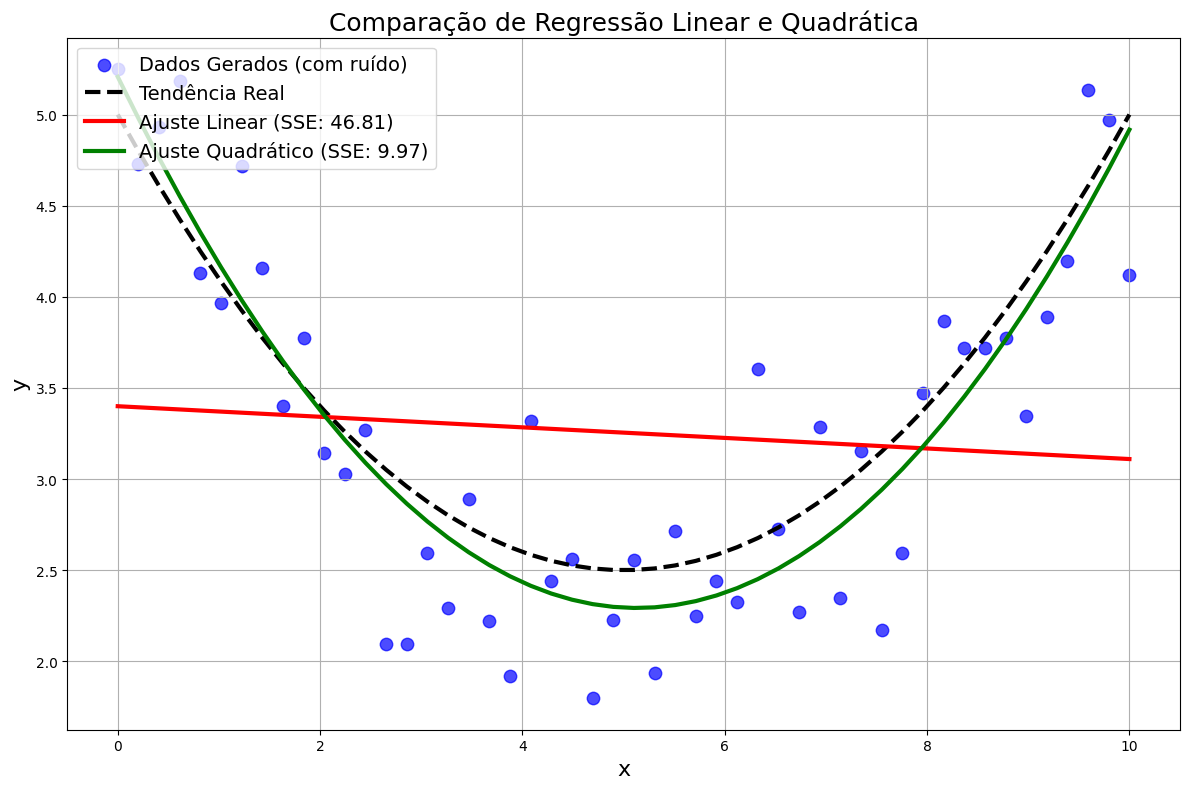

In [31]:
import matplotlib.pyplot as plt

# 1. Gerar dados sintéticos
num_samples_plot = 50
true_poly_coeffs_plot = [0.1,-1, 5] # y = 0.1x^2 - 1x + 5
noise_level_plot = .5
x_data_plot, y_data_plot, y_true_plot = generate_data(num_samples_plot, true_poly_coeffs_plot, noise_level_plot)

# 2. Aplicar regressão linear customizada
a_linear, b_linear, sse_linear = custom_linear_regression(x_data_plot, y_data_plot)

# 3. Aplicar regressão quadrática customizada
c_quad, b_quad, a_quad, sse_quad = custom_quadratic_regression(x_data_plot, y_data_plot)

# Calcular y_pred para os ajustes
y_pred_linear = a_linear * x_data_plot + b_linear
y_pred_quad = a_quad + b_quad * x_data_plot + c_quad * x_data_plot**2

# 4. Criar um novo plot
plt.figure(figsize=(12, 8))

# 5. Plotar os dados gerados
plt.scatter(x_data_plot, y_data_plot, label='Dados Gerados (com ruído)', color='blue', alpha=0.7, s=80)

# 6. Plotar a curva de tendência real
plt.plot(x_data_plot, y_true_plot, label='Tendência Real', color='black', linestyle='--', linewidth=3)

# 7. Plotar a linha de regressão linear
plt.plot(x_data_plot, y_pred_linear, label=f'Ajuste Linear (SSE: {sse_linear:.2f})', color='red', linestyle='-', linewidth=3)

# 8. Plotar a curva de regressão quadrática
plt.plot(x_data_plot, y_pred_quad, label=f'Ajuste Quadrático (SSE: {sse_quad:.2f})', color='green', linestyle='-', linewidth=3)

# 9. Adicionar anotações de SSE (opcional, já inclusas na legenda para melhor clareza)
# plt.text(1, max(y_data_plot)*0.95, f'SSE Linear: {sse_linear:.2f}', color='red', fontsize=14)
# plt.text(1, max(y_data_plot)*0.85, f'SSE Quadrático: {sse_quad:.2f}', color='green', fontsize=14)

# 10. Adicionar título e rótulos aos eixos
plt.title('Comparação de Regressão Linear e Quadrática', fontsize=18)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

# 11. Adicionar legenda
plt.legend(loc='upper left', fontsize=14)

# 12. Adicionar grade e ajustar layout
plt.grid(True)
plt.tight_layout()
plt.show()